In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Проверяем формат столбцов

In [98]:
df.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

Сразу переведем столбец "Дата" в правильный формат

In [101]:
df = pd.read_csv('data.csv', parse_dates=['Дата'])

Сгруппируйте данные по дате, посчитайте количество продаж

In [104]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество продаж')

In [106]:
grouped_df

,Дата,Количество продаж
0,2018-01-04,1840
1,2018-01-05,1301
2,2018-01-06,1306
3,2018-01-07,1322
4,2018-01-09,1719
...,...,...
200,2018-08-26,1462
201,2018-08-28,1731
202,2018-08-29,1497
203,2018-08-30,1445


Вывести несколько первых строк сгруппированных данных

In [109]:
grouped_df.head()

,Дата,Количество продаж
0,2018-01-04,1840
1,2018-01-05,1301
2,2018-01-06,1306
3,2018-01-07,1322
4,2018-01-09,1719


Нарисуйте график продаж у `grouped_df`

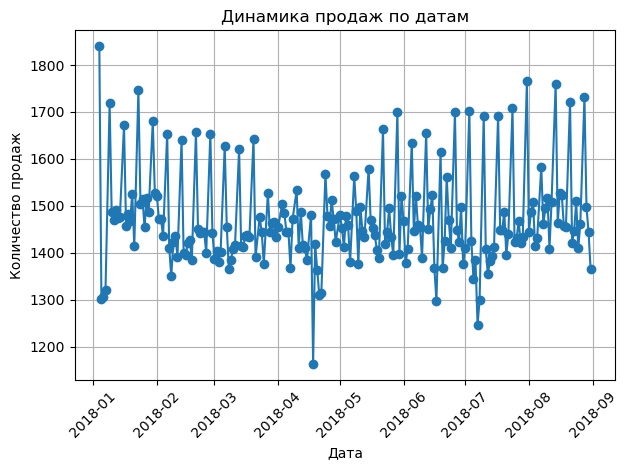

In [112]:
plt.plot(grouped_df['Дата'], grouped_df['Количество продаж'], marker='o')
plt.title('Динамика продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
На графике представлена линия, показывающая, как менялось количество продаж по датам. По оси X расположены даты, по оси Y — общее количество проданных единиц товаров (сумма по столбцу количество для каждой даты).
Рост/падение продаж:
Когда линия идёт вверх — продажи растут.
Если вниз — возможно, спад спроса или логистические проблемы.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [114]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

# Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Найти выбросы
outliers = df[df['Количество'] > upper_bound]

# Найти строку с максимальным выбросом
max_outlier = outliers.loc[outliers['Количество'].idxmax()]

print(max_outlier)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [116]:
df['Дата'] = pd.to_datetime(df['Дата'])

# Фильтруем по условиям
filtered_df = df[
    (df['Дата'].dt.dayofweek == 2) &                      # Среда (0=Пн, ..., 6=Вс)
    (df['Дата'].dt.month.isin([6, 7, 8])) &               # Июнь, июль, август
    (df['Склад'] == 3)                                    # Только склад №3
]

# Группируем по товару и считаем общую сумму продаж
top_goods = filtered_df.groupby('Номенклатура')['Количество'].sum().reset_index()

# Находим товар с наибольшими продажами
top_good = top_goods.loc[top_goods['Количество'].idxmax()]

print("Топовый товар по продажам по средам в июне–августе на складе 3:")
print(top_good)

Топовый товар по продажам по средам в июне–августе на складе 3:
Номенклатура    product_1
Количество           2267
Name: 1, dtype: object


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [118]:
weather_df = pd.read_csv('weather.csv')

In [120]:
weather_df.head()

,Дата,Tемпература
0,21.05.2025,17.0
1,21.05.2025,21.3
2,21.05.2025,24.3
3,21.05.2025,24.9
4,21.05.2025,22.7


In [122]:
weather_df = weather_df[['Дата', 'Tемпература']]
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], dayfirst=True)

In [124]:
merged_df = pd.merge(grouped_df, weather_df, on='Дата', how='inner')

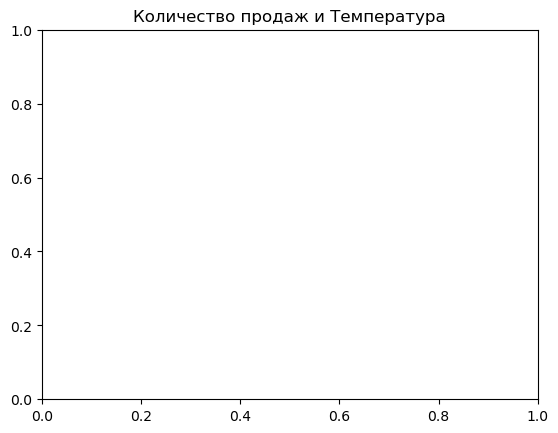

In [126]:
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='tab:blue')
ax1.plot(merged_df['Дата'], merged_df['Количество продаж'], color='tab:blue', label='Количество продаж')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # второй y-axis
ax2.set_ylabel('Tемпература', color='tab:red')
ax2.plot(merged_df['Дата'], merged_df['Tемпература'], color='tab:red', label='Tемпература')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Количество продаж и Tемпература')
plt.show()

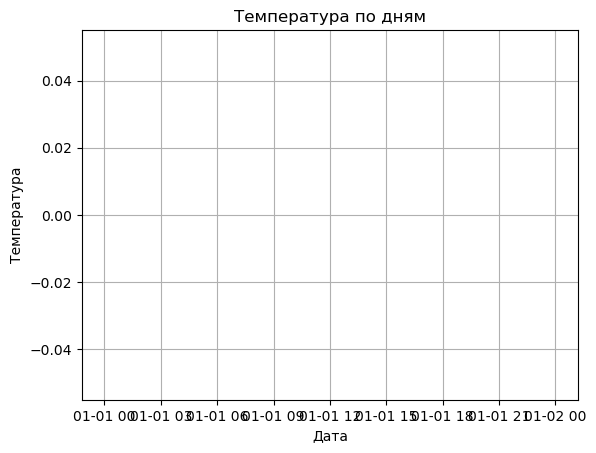

In [128]:
plt.plot(merged_df['Дата'], merged_df['Tемпература'], color='tab:red')
plt.xlabel('Дата')
plt.ylabel('Tемпература')
plt.title('Температура по дням')
plt.grid(True)
plt.show()

In [150]:
print(weather_df.head())
print(weather_df.info())

        Дата  Tемпература
0 2025-05-21         17.0
1 2025-05-21         21.3
2 2025-05-21         24.3
3 2025-05-21         24.9
4 2025-05-21         22.7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Дата         56 non-null     datetime64[ns]
 1   Tемпература  56 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB
None


In [152]:
print(grouped_df.head())
print(grouped_df.info())

        Дата  Количество продаж
0 2018-01-04               1840
1 2018-01-05               1301
2 2018-01-06               1306
3 2018-01-07               1322
4 2018-01-09               1719
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Дата               205 non-null    datetime64[ns]
 1   Количество продаж  205 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.3 KB
None


In [154]:
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], dayfirst=True)
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'], dayfirst=True)

In [156]:
print("Первые 5 дат в grouped_df:", grouped_df['Дата'].head())
print("Первые 5 дат в weather_df:", weather_df['Дата'].head())

common_dates = set(grouped_df['Дата']).intersection(set(weather_df['Дата']))
print(f"Количество общих дат: {len(common_dates)}")

Первые 5 дат в grouped_df: 0   2018-01-04
1   2018-01-05
2   2018-01-06
3   2018-01-07
4   2018-01-09
Name: Дата, dtype: datetime64[ns]
Первые 5 дат в weather_df: 0   2025-05-21
1   2025-05-21
2   2025-05-21
3   2025-05-21
4   2025-05-21
Name: Дата, dtype: datetime64[ns]
Количество общих дат: 0


In [158]:
merged_df = pd.merge(grouped_df, weather_df, on='Дата', how='outer')
print(merged_df.head(10))

        Дата  Количество продаж  Tемпература
0 2018-01-04             1840.0          NaN
1 2018-01-05             1301.0          NaN
2 2018-01-06             1306.0          NaN
3 2018-01-07             1322.0          NaN
4 2018-01-09             1719.0          NaN
5 2018-01-10             1487.0          NaN
6 2018-01-11             1471.0          NaN
7 2018-01-12             1492.0          NaN
8 2018-01-13             1475.0          NaN
9 2018-01-14             1477.0          NaN


In [160]:
weather_df['Дата'] = weather_df['Дата'].dt.normalize()
grouped_df['Дата'] = grouped_df['Дата'].dt.normalize()

In [162]:
print(merged_df[['Количество продаж', 'Tемпература']].describe())

       Количество продаж  Tемпература
count          205.00000    56.000000
mean          1470.02439    20.262500
std            102.28600     6.743362
min           1164.00000     7.500000
25%           1411.00000    15.175000
50%           1448.00000    20.150000
75%           1497.00000    24.600000
max           1840.00000    34.300000
